## Fear Prediction with Audio Visual features

In [2]:
import numpy as np
import pylab as pl
import re, fileinput
import os.path
import glob

import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import matplotlib.colors as colors


import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

In [3]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
from scipy.stats import pearsonr

In [4]:


# Input data
movieNames = ['After_The_Rain','Attitude_Matters','Barely_legal_stories','Between_Viewings','Big_Buck_Bunny','Chatter','Cloudland','Damaged_Kung_Fu','Decay','Elephant_s_Dream','First_Bite','Full_Service','Islands','Lesson_Learned','Norm','Nuclear_Family','On_time','Origami','Parafundit','Payload','Riding_The_Rails','Sintel','Spaceman','Superhero','Tears_of_Steel','The_room_of_franz_kafka','The_secret_number','To_Claire_From_Sonny','Wanted','You_Again']

pathcontinuous = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/ContinuousLIRIS-ACCEDE/"
continuousAnnotationsFolder = pathcontinuous +'continuous-annotations/'
devdatacontinous =  pathcontinuous + "continuous-movies/"
pathcontfeatures = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/features-out-1/"

med2017visualFeaturesfolder='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Visual_features/MEDIAEVAL17-DevSet-Visual_features/features/'
med2017audiofolder='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Audio_features/MEDIAEVAL17-DevSet-Audio_features/features/'
med2017annotationsFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/annotations/'
med2017fearFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Fear-annotations/MEDIAEVAL17-DevSet-Fear-annotations/annotations/'


In [5]:
med2017visualFeaturesfolderTest='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Visual_features/MEDIAEVAL17-TestSet-Visual_features/visual_features/'
med2017audiofolderTest = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Audio_features/MEDIAEVAL17-TestSet-Audio_features/audio_features/'
med2017datafolderTest = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Data/MEDIAEVAL17-TestSet-Data/data/'


In [6]:
files = glob.glob(med2017datafolderTest+'*')
testmovienames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [7]:
files = glob.glob(devdatacontinous+'*')
devmovienames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [36]:
len(testmovienames), testmovienames[0]

(14, 'MEDIAEVAL17_00')

In [9]:
len(devmovienames)

30

In [10]:
groups = {
    0:['Decay'],
    1:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    2:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    3:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    4:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    5:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    6:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload']
}

In [11]:
def gettraintestmovielist(groupno):
    testlist = groups[groupno]
    trainlist =[]
    for idx, group in enumerate(groups):
        if idx != groupno:
            for g in groups[idx]:
                trainlist.append(g)
    return trainlist, testlist



In [12]:
trainlist, testlist=gettraintestmovielist(1)  # index 1 olanları test , diğerlerini train yapan fonksiyon

## Fear Annotations

In [13]:
def getFearDf(movname):
    filename = os.path.join(med2017fearFolder, movname + '-MEDIAEVAL2017-fear.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df


## Audio Features

In [43]:
def getAudioDf(moviename,folder=med2017audiofolder):
    if 'TestSet' in folder:
        files = glob.glob(folder+moviename+'/audio_features/*.csv')
    else:
        files = glob.glob(folder+moviename+'/*.csv')
    files = sorted(files)
    files
    alist = []
    for fname in files:
        f=open(fname,'r')
        h = []
        for l in f :
            if '@attribute' in l:
                h.append(l.split()[1])
            elif l == '\n':
                l
            elif l[0] =='@':
                l
            else:
                alist.append(map(float,l.split(',')[1:])) #first attribute is string ,skipped
        f.close()
    
    return pd.DataFrame(alist,columns=h[1:])

In [44]:
def getMovieListAudioFearDf(movieNames,folder=med2017audiofolder):
    Xa = getAudioDf(movieNames[0],folder)
    y = getFearDf(movieNames[0]).Fear
    
    mlen = min(len(Xa),len(y))
    Xa = Xa[:mlen]
    y = y[:mlen]
    
    for mov in movieNames[1:]:
        tXa = getAudioDf(mov)
        ty = getFearDf(mov).Fear
        
        mlen = min(len(tXa),len(ty))
        tXa = tXa[:mlen]
        ty = ty[:mlen]
    
        Xa  = Xa.append(tXa)
        y  = y.append(ty)
        
    return Xa,y

In [45]:
#movielisttrain, movielisttest=gettraintestmovielist(1)
#Xtrain, ytrain = getMovieListAudioFearDf(movielisttrain)
#Xtest, ytest = getMovieListAudioFearDf(movielisttest)
#Xtrain.shape, Xtest.shape, ytrain.shape,ytest.shape

In [48]:

moviename=testmovienames[0]
x = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Audio_features/MEDIAEVAL17-TestSet-Audio_features/audio_features/MEDIAEVAL17_00/audio_features'
files = glob.glob(folder+moviename+'/*.csv')
files = sorted(files)
files


[]

In [50]:
getAudioDf('MEDIAEVAL17_00',folder=med2017audiofolderTest).tail()

,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,...,shimmerLocal_sma_de_quartile3,shimmerLocal_sma_de_iqr1-2,shimmerLocal_sma_de_iqr2-3,shimmerLocal_sma_de_iqr1-3,shimmerLocal_sma_de_percentile99.0,shimmerLocal_sma_de_upleveltime75,shimmerLocal_sma_de_upleveltime90,F0final__Turn_numOnsets,F0final__Turn_duration,class
697,0.106855,0.829637,0.852046,-0.000157,0.929687,0.209044,0.067497,0.263648,0.390346,3.152241,...,0.021428,0.022073,0.021821,0.043894,0.095908,0.028125,0.007812,75.0,9.94,0.0
698,0.088710,0.325605,0.738424,-0.000341,0.907216,0.177802,0.050125,0.244215,0.410533,3.210107,...,0.024421,0.023236,0.024831,0.048068,0.097257,0.025875,0.001522,86.0,9.94,0.0
699,0.063508,0.953629,0.605516,-0.000294,0.751372,0.178130,0.050538,0.240091,0.502912,3.313422,...,0.025357,0.024235,0.025224,0.049460,0.096655,0.028221,0.001227,55.0,9.94,0.0
700,0.085685,0.826613,0.330855,-0.000917,0.785109,0.114078,0.024103,0.304998,0.846811,2.990309,...,0.020827,0.021305,0.021116,0.042421,0.089438,0.057428,0.004994,14.0,9.94,0.0
701,0.065524,0.322581,0.049795,-0.000236,0.166744,0.053386,0.004777,0.096671,1.997082,5.894458,...,0.017826,0.014699,0.019474,0.034174,0.070017,0.070288,0.009585,1.0,9.94,0.0


In [30]:
getAudioDf(movieNames[0]).tail()

,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,...,shimmerLocal_sma_de_quartile3,shimmerLocal_sma_de_iqr1-2,shimmerLocal_sma_de_iqr2-3,shimmerLocal_sma_de_iqr1-3,shimmerLocal_sma_de_percentile99.0,shimmerLocal_sma_de_upleveltime75,shimmerLocal_sma_de_upleveltime90,F0final__Turn_numOnsets,F0final__Turn_duration,class
111,0.887097,0.006048,0.563133,0.000034,0.546316,0.133562,0.028077,0.167843,0.140462,2.808594,...,0.045311,0.038814,0.050587,0.089402,0.108449,0.195122,0.073171,7.0,9.94,0.0
112,0.957661,0.416331,0.584330,-0.000009,0.588905,0.141397,0.031578,0.177722,0.349808,3.054518,...,0.024019,0.026899,0.021967,0.048866,0.094818,0.076923,0.015385,9.0,9.94,0.0
113,0.453629,0.779234,0.574909,-0.000041,0.595024,0.148152,0.033742,0.184058,0.351346,2.969054,...,0.018005,0.020586,0.015954,0.036540,0.141901,0.044248,0.017699,20.0,9.94,0.0
114,0.433468,0.275202,0.522086,-0.000144,0.593553,0.144519,0.031499,0.182223,0.327414,2.727441,...,0.019048,0.013950,0.024217,0.038167,0.130757,0.045113,0.015038,22.0,9.94,0.0
115,0.019153,0.977823,0.405450,-0.000309,0.558803,0.108302,0.018728,0.163041,0.728895,3.312402,...,0.025297,0.018701,0.030879,0.049581,0.075859,0.121212,0.030303,14.0,9.94,0.0


In [20]:
getFearDf(movieNames[0]).tail()

,Id,Time,Fear
112,112,560,0
113,113,565,0
114,114,570,0
115,115,575,0
116,116,580,0


## Visual Features

In [44]:
visual_feat = ['acc', 'cedd', 'cl', 'eh', 'fc6', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]

In [56]:
def getVisFeatureDf(moviename,typename):
    files = glob.glob(med2017visualFeaturesfolder+moviename+'/'+typename+'/*.txt')
    files = sorted(files)
    alist = []
    for fname in files:
        f=open(fname,'r')
        for l in f:
            alist.append(map(float,l.split(',')))
        f.close()
    return pd.DataFrame(alist)

def getAvgVisFeatureDf(moviename,typename):
    df = getVisFeatureDf(moviename,typename)
    dfwindow = df.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    return dfwindow

def getAvgVisFeatListDf(moviename,featlist):
    df = getVisFeatureDf(moviename,featlist[0])
    for feat in featlist[1:]:
        tdf = getVisFeatureDf(moviename,feat)
        df = pd.concat([df,tdf],axis=1)
    
    dfwindow = df.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    dfwindow.columns=list(range(len(dfwindow.columns)))
    return dfwindow

In [85]:
def getMovListVisFearDf(movieNames,featname):
    X = getAvgVisFeatureDf(movieNames[0],featname)
    y = getFearDf(movieNames[0]).Fear[:len(X)]

    for mov in movieNames[1:]:
        tX = getAvgVisFeatureDf(mov,featname)
        ty = getFearDf(mov).Fear[:len(tX)]
        X  = X.append(tX)
        y  = y.append(ty)
        
    return X,y

In [279]:
getVisFeatureDf(movieNames[1],'cl').tail(10)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
1364,2.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,32.0,16.0,16.0,16.0,16.0,16.0
1365,2.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,32.0,16.0,16.0,16.0,16.0,16.0
1366,2.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,32.0,16.0,16.0,16.0,16.0,16.0
1367,2.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,32.0,16.0,16.0,16.0,16.0,16.0
1368,2.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,32.0,16.0,16.0,16.0,16.0,16.0
1369,2.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,32.0,16.0,16.0,16.0,16.0,16.0
1370,2.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,32.0,16.0,16.0,16.0,16.0,16.0
1371,2.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,32.0,16.0,16.0,16.0,16.0,16.0
1372,2.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,32.0,16.0,16.0,16.0,16.0,16.0
1373,2.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,32.0,16.0,16.0,16.0,16.0,16.0


In [59]:
#getAvgVisFeatureDf(movieNames[0],'cl').tail()

In [65]:
#getAvgVisFeatListDf(movieNames[0],['cl']).tail()

In [77]:
#getMovListVisFearDf(movieNames[:2],'cl')

In [80]:
def getMovListVisFusionFearDf(movieNames,featlist):
    X,y = getMovListVisFearDf(movieNames,featlist[0])
    # y is the target value and it is equal for all feature type 
    for feattype in featlist[1:] :
        tX, y = getMovListVisFearDf(movieNames,feattype)
        X = pd.concat( [X,tX], axis=1 )
    return X,y

In [84]:
#xX,ty = getMovListVisFusionFearDf(movieNames[:2],['cl','gabor'])
#xX.shape,ty.shape

In [98]:
def getMovListAudioVisFearFeatListDf(movieNames,featlist):
    Xv = getAvgVisFeatureDf(movieNames[0],featlist[0])
    Xa = getAudioDf(movieNames[0])
    y = getFearDf(movieNames[0]).Fear
    
    mlen = min(len(Xv),len(Xa),len(y))
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    y = y[:mlen]
    
    for feattype in featlist[1:]:
        fXv = getAvgVisFeatureDf(movieNames[0],feattype)[:mlen]
        Xv = pd.concat( [Xv,fXv], axis=1 )

    for mov in movieNames[1:]:
        tXv = getAvgVisFeatureDf(mov,featlist[0])
        tXa = getAudioDf(mov)
        ty = getFearDf(mov).Fear
        
        mlen = min(len(tXv),len(tXa),len(ty))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        ty = ty[:mlen]
        
        for feattype in featlist[1:]:
            fXv = getAvgVisFeatureDf(mov,feattype)[:mlen]
            tXv = pd.concat( [tXv,fXv], axis=1 )

        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        y  = y.append(ty)
        
    return Xv,Xa,y

In [99]:
#tXv,tXa,ty = getMovListAudioVisFearFeatListDf(movieNames[:2],['cl','gabor'])
#tXv.shape,tXa.shape,ty.shape

In [144]:
%%time
featlist = ['gabor', 'jcd', 'lbp', 'sc', 'tamura' ]

movielisttrain, movielisttest=gettraintestmovielist(0)

Xtrainv,Xtraina, ytrain = getMovListAudioVisFearFeatListDf(movielisttrain,featlist)
Xtestv,Xtesta, ytest = getMovListAudioVisFearFeatListDf(movielisttest,featlist)

print Xtrainv.shape,Xtraina.shape , ytrain.shape
print Xtestv.shape,Xtesta.shape, ytest.shape

(4352, 566) (4352, 1583) (4352,)
(912, 566) (912, 1583) (912,)
CPU times: user 19.4 s, sys: 624 ms, total: 20 s
Wall time: 20.1 s


## Low level cinematographic Features

In [272]:
def getLowFeatureDf(movname):
    fname = movname +'.mp4continous_features.txt'
    print(fname)
    df = pd.DataFrame(np.genfromtxt( os.path.join(pathcontfeatures,fname)))
    df.columns = ['time','framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']
    return df


def getLowFeatureSecDf(movname):
    pdf = getLowFeatureDf(movname)
    dfwindow = pdf[ pdf.time % 23 == 1]
    #dfwindow = pdf.rolling(3).mean()[3::1]
    dfwindow.reset_index(inplace=True)
    #dfwindow.columns = ['time','framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']
    #return dfwindow[['framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']]
    return dfwindow

def getLowFeature10SecDf(movname):
    pdf = getLowFeatureDf(movname)
    dfwindow = pdf[ pdf.time % 23 == 1]
    dfwindow.reset_index(inplace=True)
    #dfwindow.drop('index',axis=1,inplace=True)
    #dfwindow = dfwindow.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    
    #dfwindow[['framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']]
    return dfwindow

In [273]:
def getMovieListLowFeatFearDf(movieNames):
    X = getLowFeature10SecDf(movieNames[0])
    y = getFearDf(movieNames[0]).Fear[:len(X)]

    for mov in movieNames[1:]:
        tX=getLowFeatureDf(mov)
        ty=getFearDf(mov).Fear[:len(tX)]
        X = X.append(tX)
        y = y.append(ty)
        if (X.shape != y.shape):
            print mov, X.shape, y.shape
    return X,y

In [282]:
getLowFeatureDf(movieNames[1]).tail()

Attitude_Matters.mp4continous_features.txt


,time,framemean,huemean,satmean,valmean,redmean,greenmean,bluemean,lummean,motion
2831,41048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2832,41065.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2833,41077.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2834,41094.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2835,41106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
getLowFeatureSecDf(movieNames[1]).tail()

Attitude_Matters.mp4continous_features.txt


,index,time,framemean,huemean,satmean,valmean,redmean,greenmean,bluemean,lummean,motion
118,2714,39354.0,69.0,143.5670,166.868,117.3970,69.10610,44.9292,117.3650,66.0,38.6361
119,2757,39975.0,63.0,29.6294,117.041,73.4644,38.09190,63.9058,72.4556,53.0,26.2662
120,2760,40021.0,56.0,55.2918,131.886,69.3947,33.15930,69.3872,40.4543,51.0,62.1748
121,2803,40642.0,24.0,31.4950,238.618,64.5270,6.21191,7.2755,64.5247,20.0,21.4353
122,2806,40688.0,36.0,61.0216,225.910,55.8651,16.34320,52.5951,14.1558,31.0,15.2208


In [278]:
getLowFeature10SecDf(movieNames[1]).tail(15)

Attitude_Matters.mp4continous_features.txt


,level_0,index,time,framemean,huemean,satmean,valmean,redmean,greenmean,bluemean,lummean,motion
108,108,2484,36019.0,67.0,12.6778,225.422,132.0460,13.20970,47.1107,129.4840,58.0,103.0420
109,109,2527,36640.0,46.0,103.4030,128.832,58.7774,53.67930,51.5517,33.1435,47.0,36.8167
110,110,2530,36686.0,31.0,133.9260,203.310,69.0138,20.92990,14.1988,69.0136,30.0,52.8005
111,111,2573,37307.0,67.0,64.5109,135.152,85.1607,47.53810,84.1673,42.9661,64.0,109.7300
112,112,2576,37353.0,59.0,19.5164,166.752,78.2611,25.24790,57.5000,78.1742,56.0,48.2361
113,113,2619,37974.0,47.0,102.1620,173.049,90.0545,33.61470,29.7874,89.2316,43.0,112.7810
114,114,2622,38020.0,115.0,19.3364,174.024,152.7500,48.96230,110.1110,151.7310,118.0,126.1760
115,115,2665,38641.0,98.0,34.5781,149.074,135.4420,55.11840,88.4177,133.6980,100.0,119.0880
116,116,2668,38687.0,40.0,11.0414,185.597,69.5099,20.69300,28.9830,69.4964,30.0,163.9800
117,117,2711,39308.0,72.0,138.4900,165.376,121.8920,69.36910,48.2584,121.8800,68.0,175.2810


In [258]:
tX,ty = getMovieListLowFeatFearDf(movieNames)

/home/yt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Attitude_Matters (2957, 11) (390,)
Barely_legal_stories (5019, 11) (587,)
Between_Viewings (6793, 11) (763,)
Big_Buck_Bunny (7986, 11) (881,)
Chatter (9005, 11) (982,)
Cloudland (10409, 11) (1121,)
Damaged_Kung_Fu (12438, 11) (1323,)
Decay (21960, 11) (2235,)
Elephant_s_Dream (23268, 11) (2365,)
First_Bite (24548, 11) (2492,)
Full_Service (26866, 11) (2715,)
Islands (27229, 11) (2748,)
Lesson_Learned (28839, 11) (2903,)
Norm (29621, 11) (2980,)
Nuclear_Family (33167, 11) (3319,)
On_time (33791, 11) (3380,)
Origami (34791, 11) (3479,)
Parafundit (36373, 11) (3636,)
Payload (38525, 11) (3850,)
Riding_The_Rails (40404, 11) (4029,)
Sintel (42180, 11) (4205,)
Spaceman (44118, 11) (4390,)
Superhero (46477, 11) (4617,)
Tears_of_Steel (47946, 11) (4763,)
The_room_of_franz_kafka (48460, 11) (4812,)
The_secret_number (50401, 11) (4997,)
To_Claire_From_Sonny (51265, 11) (5079,)
Wanted (51501, 11) (5101,)
You_Again (53300, 11) (5274,)


## Grid-Search cross validation Logistic Regression

logictic regression classifier has lower accuracy and precision especially for visual features.

In [133]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline



pipe = make_pipeline(LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid_visual = GridSearchCV(pipe, param_grid, cv=5)
grid_visual.fit(Xtrainv, ytrain)

grid_audio = GridSearchCV(pipe, param_grid, cv=5)
grid_audio.fit(Xtraina, ytrain)


CPU times: user 8min 52s, sys: 904 ms, total: 8min 53s
Wall time: 8min 43s


In [103]:
print("Best cross-validation score: {:.2f}".format(grid_visual.best_score_))
print("Best parameters: ", grid_visual.best_params_)

print("Best cross-validation score: {:.2f}".format(grid_audio.best_score_))
print("Best parameters: ", grid_audio.best_params_)


Best cross-validation score: 0.84
('Best parameters: ', {'logisticregression__C': 0.001})
Best cross-validation score: 0.90
('Best parameters: ', {'logisticregression__C': 0.001})


In [110]:
predictionsv = LogisticRegression(C=0.001).fit(Xtrainv, ytrain).predict(Xtestv)
predictionsa = LogisticRegression(C=0.001).fit(Xtraina, ytrain).predict(Xtesta)

print('Logistic Regression:\n {}\n'.format(metrics.classification_report(predictionsv,ytest)))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(predictionsa,ytest))) 

Logistic Regression:
              precision    recall  f1-score   support

          0       1.00      0.96      0.98       708
          1       0.00      0.00      0.00         0

avg / total       1.00      0.96      0.98       708


Logistic Regression:
              precision    recall  f1-score   support

          0       0.99      0.96      0.98       702
          1       0.04      0.17      0.06         6

avg / total       0.98      0.95      0.97       708




In [132]:
%%time
lgcv = LogisticRegression(C=0.001)
lgcv.fit(Xtrainv, ytrain)

lgca = LogisticRegression(C=0.001)
lgca.fit(Xtraina, ytrain)

print('Visual Logistic Regression:\n {}\n'.format(metrics.classification_report(ytest,lgcv.predict(Xtestv))))
print('Visual Logistic Regression AVP: {:.2f}'.format(metrics.average_precision_score(ytest,lgcv.predict(Xtestv) , average='macro')))
print('Visual Logistic Accuracy:       {:.2f}'.format(metrics.accuracy_score(ytest,lgcv.predict(Xtestv))))

print('Audio Logistic Regression:\n {}\n'.format(metrics.classification_report(ytest,lgca.predict(Xtesta)))) 
print('Audio Logistic Regression AVP: {:.2f}'.format(metrics.average_precision_score(ytest,lgca.predict(Xtesta) , average='macro')))
print('Audio Logistic Accuracy:       {:.2f}'.format(metrics.accuracy_score(ytest,lgca.predict(Xtesta))))

latefusionXtrain = np.transpose([lgcv.predict(Xtrainv),lgca.predict(Xtraina)])

fuslgc = LogisticRegression(C=0.001)
fuslgc.fit(latefusionXtrain,ytrain)

#Test
latefusionXtest = np.transpose([lgcv.predict(Xtestv),lgca.predict(Xtesta)])
pred_ytest = fuslgc.predict(latefusionXtest)

print('Fusion Logistic Regression:\n {}\n'.format(metrics.classification_report(pred_ytest,ytest)))



Visual Logistic Regression:
              precision    recall  f1-score   support

          0       0.96      1.00      0.98       680
          1       0.00      0.00      0.00        28

avg / total       0.92      0.96      0.94       708


Visual Logistic Regression AVP: 0.52
Visual Logistic Accuracy:       0.96
Audio Logistic Regression:
              precision    recall  f1-score   support

          0       0.96      0.99      0.98       680
          1       0.17      0.04      0.06        28

avg / total       0.93      0.95      0.94       708


Audio Logistic Regression AVP: 0.12
Audio Logistic Accuracy:       0.95
Fusion Logistic Regression:
              precision    recall  f1-score   support

          0       1.00      0.96      0.98       708
          1       0.00      0.00      0.00         0

avg / total       1.00      0.96      0.98       708


CPU times: user 8.93 s, sys: 16 ms, total: 8.95 s
Wall time: 8.93 s


## SVC Classifier
Parameters are found with grid search:


{'classifier': SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'classifier__C': 0.001,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}



In [213]:
%%time
lgcv = SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)
lgcv.fit(Xtrainv, ytrain)

lgca = SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)
lgca.fit(Xtraina, ytrain)

print('Visual SVC :\n {}\n'.format(metrics.classification_report(ytest,lgcv.predict(Xtestv))))
print('Visual SVC AVP: {:.2f}'.format(metrics.average_precision_score(ytest,lgcv.predict(Xtestv) , average='macro')))
print('Visual SVC Accuracy:       {:.2f}'.format(metrics.accuracy_score(ytest,lgcv.predict(Xtestv))))

print('Audio SVC:\n {}\n'.format(metrics.classification_report(ytest,lgca.predict(Xtesta)))) 
print('Audio SVC AVP: {:.2f}'.format(metrics.average_precision_score(ytest,lgca.predict(Xtesta) , average='macro')))
print('Audio SVC Accuracy:       {:.2f}'.format(metrics.accuracy_score(ytest,lgca.predict(Xtesta))))

latefusionXtrain = np.transpose([lgcv.predict(Xtrainv),lgca.predict(Xtraina)])

fuslgc = LogisticRegression(C=0.01)
fuslgc.fit(latefusionXtrain,ytrain)

#Test
latefusionXtest = np.transpose([lgcv.predict(Xtestv),lgca.predict(Xtesta)])
pred_ytest = fuslgc.predict(latefusionXtest)

print('Fusion Logistic Regression:\n {}\n'.format(metrics.classification_report(pred_ytest,ytest)))



Visual SVC :
              precision    recall  f1-score   support

          0       0.87      1.00      0.93       793
          1       0.00      0.00      0.00       119

avg / total       0.76      0.87      0.81       912


Visual SVC AVP: 0.57
Visual SVC Accuracy:       0.87
Audio SVC:
              precision    recall  f1-score   support

          0       0.87      1.00      0.93       793
          1       0.00      0.00      0.00       119

avg / total       0.76      0.87      0.81       912


Audio SVC AVP: 0.57
Audio SVC Accuracy:       0.87
Fusion Logistic Regression:
              precision    recall  f1-score   support

          0       1.00      0.87      0.93       912
          1       0.00      0.00      0.00         0

avg / total       1.00      0.87      0.93       912


CPU times: user 11.9 s, sys: 0 ns, total: 11.9 s
Wall time: 11.9 s


In [284]:
## Models are stored
from sklearn.externals import joblib
joblib.dump(lgcv, 'models/fear-visual-svm.pkl')
joblib.dump(lgca, 'models/fear-audio-svm.pkl')
joblib.dump(fuslgc, 'models/fear-fusion-logisticreg.pkl')


['models/fear-fusion-logisticreg.pkl']

In [287]:
# Load Models
visusvm = joblib.load('models/fear-visual-svm.pkl')
audisvm = joblib.load('models/fear-audio-svm.pkl')
fusesvm = joblib.load('models/fear-fusion-logisticreg.pkl')


In [ ]:
#RUN-1


## Gradient Boosting Classifier

Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. 

In [114]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation
from sklearn import metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [118]:
def modelfit(alg, X, y, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9664
AUC Score (Train): 0.979824
CV Score : Mean - 0.5297799 | Std - 0.03963452 | Min - 0.4689694 | Max - 0.5934793


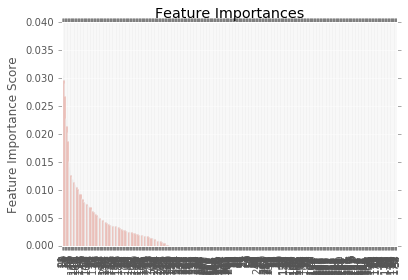

In [119]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, Xtrainv, ytrain)


Model Report
Accuracy : 0.9723
AUC Score (Train): 0.993630
CV Score : Mean - 0.6376591 | Std - 0.06826815 | Min - 0.525855 | Max - 0.7159599


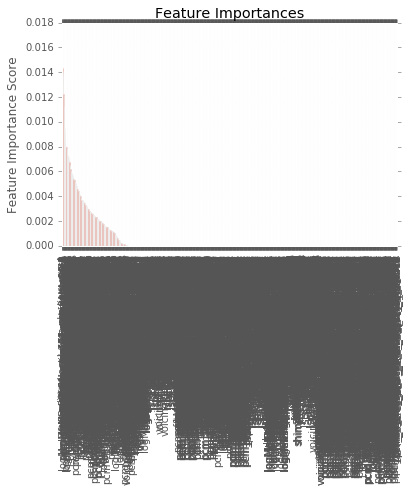

In [120]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, Xtraina, ytrain)

In [ ]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img


In [138]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        learning_rate=0.05,  
        min_samples_split=500,
        min_samples_leaf=50,
        max_depth=8,
        max_features='sqrt',subsample=0.8,random_state=10), 
    param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(Xtrainv,ytrain)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


/home/yt/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54226, std: 0.07442, params: {'n_estimators': 20},
  mean: 0.54990, std: 0.08733, params: {'n_estimators': 30},
  mean: 0.54684, std: 0.07985, params: {'n_estimators': 40},
  mean: 0.54879, std: 0.06209, params: {'n_estimators': 50},
  mean: 0.54235, std: 0.05848, params: {'n_estimators': 60},
  mean: 0.54326, std: 0.06461, params: {'n_estimators': 70},
  mean: 0.54129, std: 0.05815, params: {'n_estimators': 80}],
 {'n_estimators': 30},
 0.54990240301074111)

In [140]:

gsearch1.fit(Xtraina,ytrain)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/home/yt/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.59704, std: 0.06433, params: {'n_estimators': 20},
  mean: 0.60486, std: 0.06826, params: {'n_estimators': 30},
  mean: 0.60883, std: 0.07519, params: {'n_estimators': 40},
  mean: 0.61834, std: 0.06611, params: {'n_estimators': 50},
  mean: 0.61935, std: 0.06735, params: {'n_estimators': 60},
  mean: 0.61745, std: 0.06764, params: {'n_estimators': 70},
  mean: 0.61837, std: 0.06843, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.61935109229927554)

In [145]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(Xtraina,ytrain)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/home/yt/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.65856, std: 0.07867, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.67126, std: 0.09543, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.67575, std: 0.08657, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.68706, std: 0.10208, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.68417, std: 0.09009, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.66692, std: 0.08614, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.66522, std: 0.07414, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.67908, std: 0.07967, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.68920, std: 0.08261, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.68779, std: 0.06802, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.67400, std: 0.07357, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.69058, std: 0.08931, params: {'min_samples_split': 400, 'max_depth': 9},
  

In [146]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(Xtraina,ytrain)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/home/yt/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.69246, std: 0.07509, params: {'min_samples_split': 1000, 'min_samples_leaf': 30},
  mean: 0.69361, std: 0.07556, params: {'min_samples_split': 1200, 'min_samples_leaf': 30},
  mean: 0.69994, std: 0.07476, params: {'min_samples_split': 1400, 'min_samples_leaf': 30},
  mean: 0.71255, std: 0.07542, params: {'min_samples_split': 1600, 'min_samples_leaf': 30},
  mean: 0.71428, std: 0.07999, params: {'min_samples_split': 1800, 'min_samples_leaf': 30},
  mean: 0.71123, std: 0.08337, params: {'min_samples_split': 2000, 'min_samples_leaf': 30},
  mean: 0.68671, std: 0.07592, params: {'min_samples_split': 1000, 'min_samples_leaf': 40},
  mean: 0.68655, std: 0.07073, params: {'min_samples_split': 1200, 'min_samples_leaf': 40},
  mean: 0.69469, std: 0.07493, params: {'min_samples_split': 1400, 'min_samples_leaf': 40},
  mean: 0.70010, std: 0.07755, params: {'min_samples_split': 1600, 'min_samples_leaf': 40},
  mean: 0.70374, std: 0.08813, params: {'min_samples_split': 1800, 'min_samples_

In [153]:
gsearch3.cv_results_['mean_test_score']

array([ 0.692465  ,  0.69361399,  0.69994245,  0.71255225,  0.71428363,
        0.71122594,  0.68671004,  0.68655353,  0.69468706,  0.70009979,
        0.70374395,  0.71003441,  0.68720742,  0.69015006,  0.69543578,
        0.69411825,  0.69941688,  0.70298527,  0.6747043 ,  0.6834856 ,
        0.6844616 ,  0.69861013,  0.69657857,  0.70115528,  0.67210786,
        0.67606228,  0.6886933 ,  0.69452147,  0.68991434,  0.68492845])

In [154]:
gsearch3.cv_results_['mean_test_score'].reshape(6,-1)

array([[ 0.692465  ,  0.69361399,  0.69994245,  0.71255225,  0.71428363],
       [ 0.71122594,  0.68671004,  0.68655353,  0.69468706,  0.70009979],
       [ 0.70374395,  0.71003441,  0.68720742,  0.69015006,  0.69543578],
       [ 0.69411825,  0.69941688,  0.70298527,  0.6747043 ,  0.6834856 ],
       [ 0.6844616 ,  0.69861013,  0.69657857,  0.70115528,  0.67210786],
       [ 0.67606228,  0.6886933 ,  0.69452147,  0.68991434,  0.68492845]])

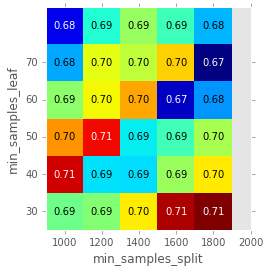

In [158]:
heatmap(gsearch3.cv_results_['mean_test_score'].reshape(6, -1),
                      xlabel="min_samples_split", ylabel="min_samples_leaf",
                      xticklabels=param_test3['min_samples_split'],
                      yticklabels=param_test3['min_samples_leaf'])

In [ ]:
param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],


In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001, 1, 10],
     'classifier__C': [0.001, 1, 10]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [3]}]

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(Xtraina,ytrain)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
grid.grid_scores_, grid.best_params_, grid.best_score_

Best params:
{'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True), 'classifier': SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 0.001}

Best cross-validation score: 0.96


/home/yt/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.96232, std: 0.00043, params: {'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True), 'classifier': SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 0.001},
  mean: 0.96232, std: 0.00043, params: {'classifier__gamma': 1, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True), 'classifier': SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 0.001},
  mean: 0.96232, std: 0.00043, params: {'classifier__gamma': 10, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True), 'classifier': SVC(C=0.001, cache_size=200, class

In [168]:
grid.cv_results_['mean_test_score']

array([ 0.96231618,  0.96231618,  0.96231618,  0.96231618,  0.96231618,
        0.96231618,  0.96185662,  0.96231618,  0.96231618,  0.96231618])

In [167]:
 grid.best_params_

{'classifier': SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'classifier__C': 0.001,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}